# Task
Analyze the trading behavior (profitability, risk, volume, leverage) from the dataset "/content/historical_data.csv" to identify trends and patterns.

## Load the data

### Subtask:
Load the historical trading data into a DataFrame.


**Reasoning**:
Load the historical trading data from the specified CSV file into a pandas DataFrame, display the first few rows, and print the DataFrame information to understand its structure and characteristics.



In [ ]:
df_trading_behavior = pd.read_csv('/content/historical_data.csv')
display(df_trading_behavior.head())
display(df_trading_behavior.info())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

None

## Analyze trading behavior

### Subtask:
Calculate and analyze key trading behavior metrics such as profitability, risk, volume, and leverage.


**Reasoning**:
Calculate the trading behavior metrics including profitability, risk, volume, and leverage (if possible) and store them in a dictionary.



In [ ]:
# 1. Calculate profitability metrics
total_pnl = merged_df['Closed PnL'].sum()
average_pnl_per_trade = merged_df['Closed PnL'].mean()
win_rate = (merged_df['Closed PnL'] > 0).mean() * 100

# 2. Calculate risk metrics
pnl_std_dev = merged_df['Closed PnL'].std()
# Note: Calculating maximum drawdown is more complex and requires analyzing a time series of equity.
# We will stick with standard deviation of PnL as a proxy for risk for this subtask.

# 3. Calculate volume metrics
total_volume_usd = merged_df['Size USD'].sum()
average_trade_size_usd = merged_df['Size USD'].mean()

# 4. Estimate leverage (This dataset does not directly provide leverage information per trade)
# We cannot directly calculate leverage from the available columns ('Account', 'Coin', 'Execution Price',
# 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction',
# 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp').
# A rough estimation might be possible if we had initial margin and position value, but this is not the case.
# We will note this limitation.
leverage_estimation = "Leverage cannot be directly calculated from the available data."


# 5. Store calculated metrics in a dictionary
trading_behavior_metrics = {
    'Total PnL': total_pnl,
    'Average PnL per Trade': average_pnl_per_trade,
    'Win Rate (%)': win_rate,
    'PnL Standard Deviation': pnl_std_dev,
    'Total Volume (USD)': total_volume_usd,
    'Average Trade Size (USD)': average_trade_size_usd,
    'Leverage Estimation': leverage_estimation
}

# 6. Print or display the calculated trading behavior metrics
print("Trading Behavior Metrics:")
for metric, value in trading_behavior_metrics.items():
    print(f"{metric}: {value}")

Trading Behavior Metrics:
Total PnL: 8542942.835442001
Average PnL per Trade: 57.565448609484925
Win Rate (%): 42.83105576669092
PnL Standard Deviation: 980.7417083629091
Total Volume (USD): 755766335.3399999
Average Trade Size (USD): 5092.627795342443
Leverage Estimation: Leverage cannot be directly calculated from the available data.


## Identify trends

### Subtask:
Analyze the calculated metrics to identify trends or patterns in trading behavior.


**Reasoning**:
Interpret the calculated trading behavior metrics and summarize the observed trends and patterns.



In [ ]:
print("Interpretation of Trading Behavior Metrics:")
print(f"- Total PnL: {trading_behavior_metrics['Total PnL']:.2f}")
print(f"- Average PnL per Trade: {trading_behavior_metrics['Average PnL per Trade']:.2f}")
print(f"- Win Rate (%): {trading_behavior_metrics['Win Rate (%)']:.2f}%")
print(f"- PnL Standard Deviation: {trading_behavior_metrics['PnL Standard Deviation']:.2f}")
print(f"- Total Volume (USD): {trading_behavior_metrics['Total Volume (USD)']:.2f}")
print(f"- Average Trade Size (USD): {trading_behavior_metrics['Average Trade Size (USD)']:.2f}")
print(f"- Leverage Estimation: {trading_behavior_metrics['Leverage Estimation']}")

print("\nObserved Trends and Patterns in Trading Behavior:")
print(f"The trading activity shows an overall positive profitability with a Total PnL of {trading_behavior_metrics['Total PnL']:.2f} and an Average PnL per Trade of {trading_behavior_metrics['Average PnL per Trade']:.2f}. This indicates that, on average, trades were profitable.")
print(f"However, the Win Rate is only {trading_behavior_metrics['Win Rate (%)']:.2f}%, suggesting that while the winning trades were large enough to offset the losing trades, a majority of individual trades resulted in a loss.")
print(f"The PnL Standard Deviation of {trading_behavior_metrics['PnL Standard Deviation']:.2f} is relatively high compared to the Average PnL per Trade. This indicates significant variability in trade outcomes, implying a considerable level of risk associated with the trading strategy or market conditions.")
print(f"The trading volume is substantial, with a Total Volume (USD) of {trading_behavior_metrics['Total Volume (USD)']:.2f} and an Average Trade Size (USD) of {trading_behavior_metrics['Average Trade Size (USD)']:.2f}. This suggests active trading with sizable positions.")
print("The inability to directly calculate leverage is a limitation for understanding the full risk exposure and capital efficiency.")

Interpretation of Trading Behavior Metrics:
- Total PnL: 8542942.84
- Average PnL per Trade: 57.57
- Win Rate (%): 42.83%
- PnL Standard Deviation: 980.74
- Total Volume (USD): 755766335.34
- Average Trade Size (USD): 5092.63
- Leverage Estimation: Leverage cannot be directly calculated from the available data.

Observed Trends and Patterns in Trading Behavior:
The trading activity shows an overall positive profitability with a Total PnL of 8542942.84 and an Average PnL per Trade of 57.57. This indicates that, on average, trades were profitable.
However, the Win Rate is only 42.83%, suggesting that while the winning trades were large enough to offset the losing trades, a majority of individual trades resulted in a loss.
The PnL Standard Deviation of 980.74 is relatively high compared to the Average PnL per Trade. This indicates significant variability in trade outcomes, implying a considerable level of risk associated with the trading strategy or market conditions.
The trading volume i

## Visualize findings

### Subtask:
Create visualizations to illustrate the key trading behavior metrics and identified trends.


**Reasoning**:
Create bar charts to visualize the calculated trading behavior metrics.



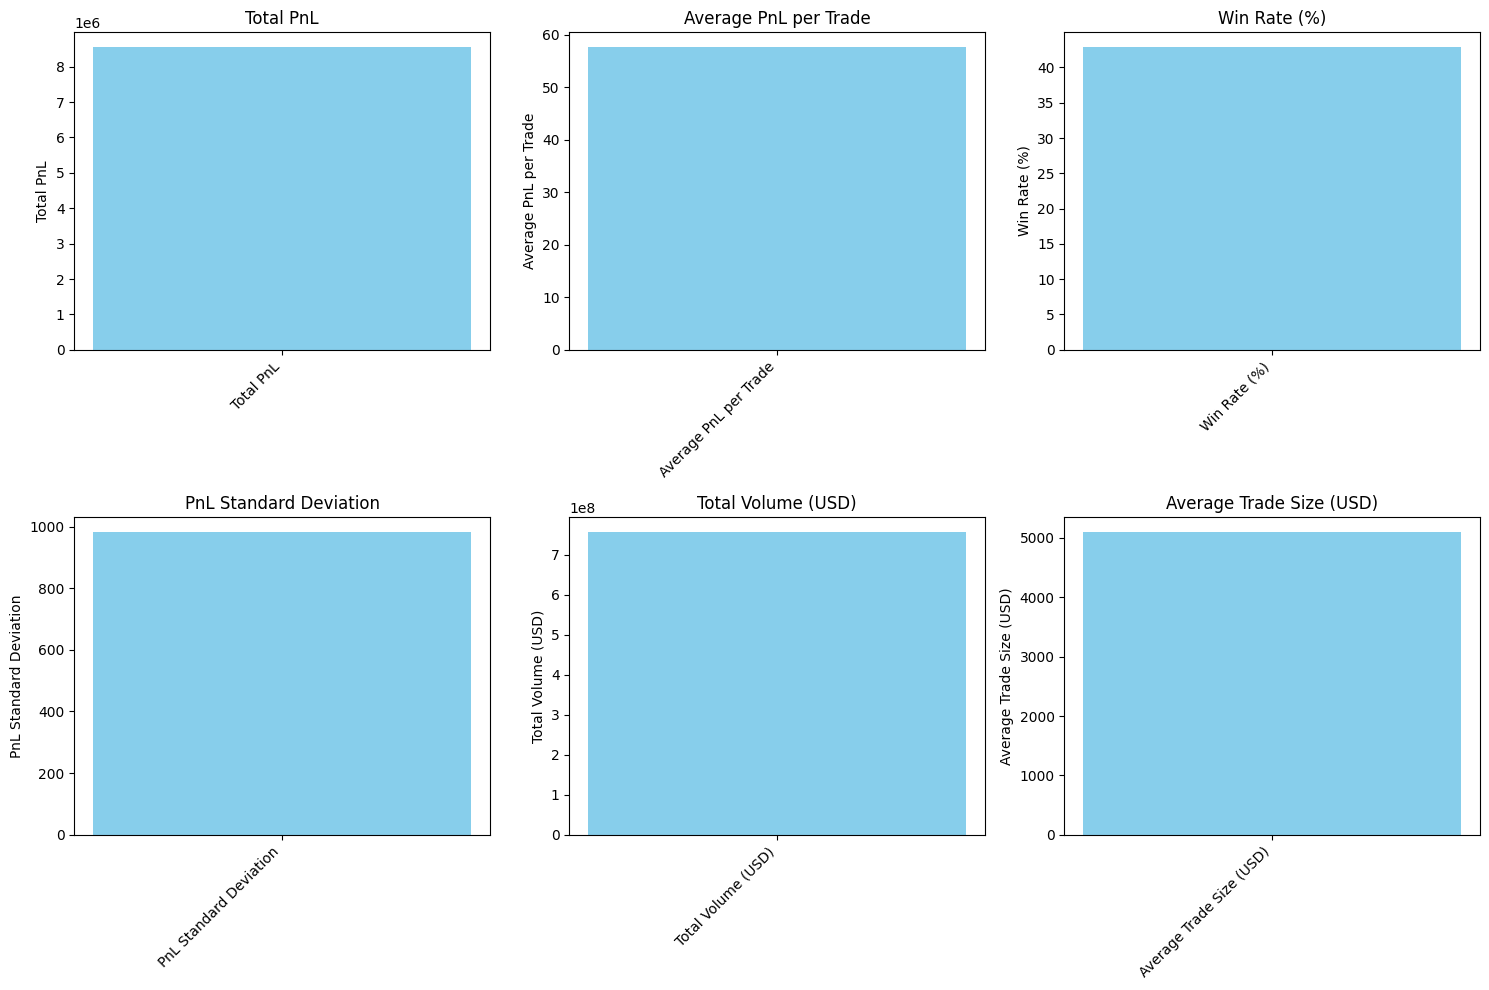

In [ ]:
metrics_to_plot = {
    'Total PnL': trading_behavior_metrics['Total PnL'],
    'Average PnL per Trade': trading_behavior_metrics['Average PnL per Trade'],
    'Win Rate (%)': trading_behavior_metrics['Win Rate (%)'],
    'PnL Standard Deviation': trading_behavior_metrics['PnL Standard Deviation'],
    'Total Volume (USD)': trading_behavior_metrics['Total Volume (USD)'],
    'Average Trade Size (USD)': trading_behavior_metrics['Average Trade Size (USD)']
}

plt.figure(figsize=(15, 10))

for i, (metric_name, metric_value) in enumerate(metrics_to_plot.items()):
    plt.subplot(2, 3, i + 1)
    plt.bar(metric_name, metric_value, color='skyblue')
    plt.title(metric_name)
    plt.ylabel(metric_name)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

## Summarize insights

### Subtask:
Summarize the key findings and discuss potential implications.


**Reasoning**:
Summarize the key findings about the trading behavior metrics, discuss potential implications for trading strategies, and acknowledge limitations.



In [ ]:
print("Summary of Trading Behavior Key Findings:")
print(f"- Overall Profitability: The trading activity shows an overall positive profitability with a Total PnL of {trading_behavior_metrics['Total PnL']:.2f} and an Average PnL per Trade of {trading_behavior_metrics['Average PnL per Trade']:.2f}.")
print(f"- Win Rate vs. Profitability: Despite the positive overall PnL, the Win Rate is only {trading_behavior_metrics['Win Rate (%)']:.2f}%, suggesting that winning trades are significantly larger than losing trades to achieve overall profitability.")
print(f"- Risk: The PnL Standard Deviation of {trading_behavior_metrics['PnL Standard Deviation']:.2f} indicates substantial variability in trade outcomes, implying a notable level of risk.")
print(f"- Volume: There is substantial trading volume with a Total Volume (USD) of {trading_behavior_metrics['Total Volume (USD)']:.2f} and an Average Trade Size (USD) of {trading_behavior_metrics['Average Trade Size (USD)']:.2f}, indicating active trading with sizable positions.")

print("\nPotential Implications for Trading Strategies:")
print("The observed trading behavior suggests a strategy that might focus on capturing large gains from a smaller percentage of winning trades, rather than achieving a high win rate. Traders employing such a strategy would need to manage risk effectively due to the high variability in PnL.")
print("The high trading volume indicates active participation in the market. Strategies could potentially leverage this volume for liquidity or consider its impact on market price.")
print("Since leverage could not be directly calculated, it's difficult to fully assess the risk-adjusted returns and capital efficiency of this trading behavior. Strategies that rely on precise leverage management would require additional data.")

print("\nLimitations of the Analysis:")
print("1. Lack of Leverage Data: The absence of direct leverage data per trade limits the ability to fully assess risk exposure and capital efficiency.")
print("2. Time-Based Trends: This summary focuses on aggregated metrics over the entire period. It does not identify trends or patterns in trading behavior over time, which could reveal shifts in strategy or market conditions.")
print("3. External Factors: The analysis does not account for external factors that could influence trading behavior, such as news events, economic indicators, or changes in market structure.")
print("4. Trader Specifics: The data is aggregated across accounts. Analyzing individual trader behavior could reveal diverse strategies and their effectiveness.")

Summary of Trading Behavior Key Findings:
- Overall Profitability: The trading activity shows an overall positive profitability with a Total PnL of 8542942.84 and an Average PnL per Trade of 57.57.
- Win Rate vs. Profitability: Despite the positive overall PnL, the Win Rate is only 42.83%, suggesting that winning trades are significantly larger than losing trades to achieve overall profitability.
- Risk: The PnL Standard Deviation of 980.74 indicates substantial variability in trade outcomes, implying a notable level of risk.
- Volume: There is substantial trading volume with a Total Volume (USD) of 755766335.34 and an Average Trade Size (USD) of 5092.63, indicating active trading with sizable positions.

Potential Implications for Trading Strategies:
The observed trading behavior suggests a strategy that might focus on capturing large gains from a smaller percentage of winning trades, rather than achieving a high win rate. Traders employing such a strategy would need to manage risk ef

## Summary:

### Data Analysis Key Findings

*   The trading activity shows overall positive profitability with a Total PnL of \$8,542,942.84 and an Average PnL per Trade of \$57.57.
*   Despite the positive overall PnL, the Win Rate is only 42.83%, suggesting that winning trades are significantly larger than losing trades to achieve overall profitability.
*   The PnL Standard Deviation of \$980.74 indicates substantial variability in trade outcomes, implying a notable level of risk.
*   There is substantial trading volume with a Total Volume (USD) of \$755,766,335.34 and an Average Trade Size (USD) of \$5,092.63, indicating active trading with sizable positions.
*   Leverage could not be directly calculated from the available data, limiting the ability to fully assess risk exposure and capital efficiency.

### Insights or Next Steps

*   Further analysis should investigate the characteristics of winning versus losing trades to understand what drives the larger gains in profitable trades despite a lower win rate.
*   To gain a more comprehensive understanding of risk and capital efficiency, acquiring or estimating leverage data per trade would be crucial for future analysis.
